## <span style="color:lightblue"> **Problem Statement 2:** </span>
I am provided with the california housing dataset. Based on the given parameters of a house, predict its price.

**Dataset Description:**

The dataset contains nine features:
- Longitude: A measure of how far west a house is; a higher value is farther west
- Latitude: A measure of how far north a house is; a higher value is farther north
- hosingMedianAge: Meduan age of a house within a block; a lower number is a newser building
- total rooms: Total number of rooms withina block
- total bedrooms: Total number of bedrooms within a block
- populations: Total number of people residing within a block
- households: Total number of households, a group of people residing within a home unit, for a block
- median income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- median house value: Median house value for households within a block (measured in US Dollars)

I'm writing a python code to perform the following tasks mentioned:
1. Load the datam check its shape and check for null values
2. Split the datset for training and testing - 1000- instances for testing
3. Train the model using sklearn (Apply linear regression to train a model for prediction)
4. Predict the prices on test data and evaluate the model by r2 score and mean absolute error
5. Find coefficient and intercept using the trained model

In [22]:
# Importing useful libraries

#dataFrame manipulation and visualiztion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('Display.max_columns', None)
pd.set_option('Display.max_rows', None)

#Needed libraries
import datetime
import math


from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
housing_df = pd.read_csv("./../Assignment_files/california_housing_train_ass4.csv")
housing_df.shape

(17000, 9)

In [3]:
housing_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

No null values in the 17000 rows and 9 columns

In [4]:
housing_df.duplicated().sum()

0

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [6]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


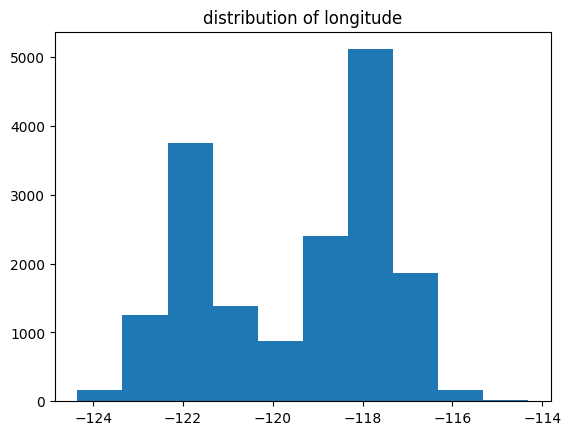

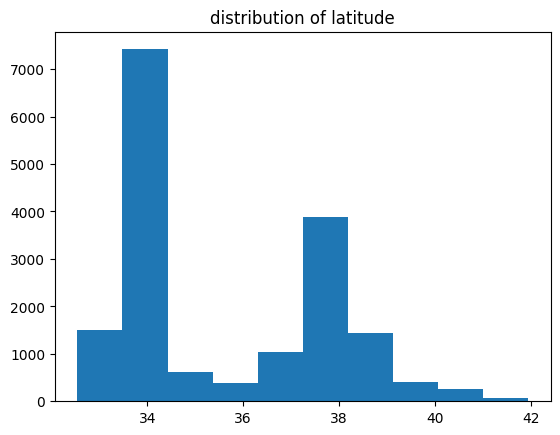

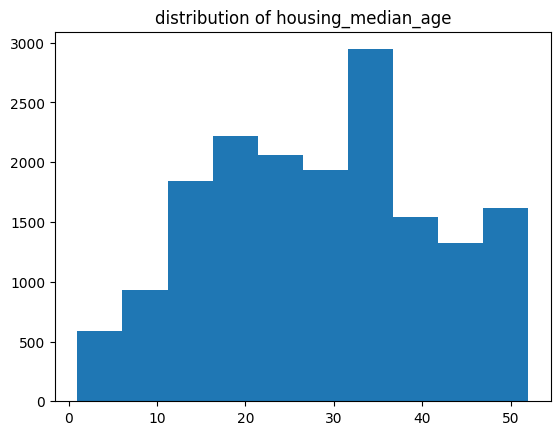

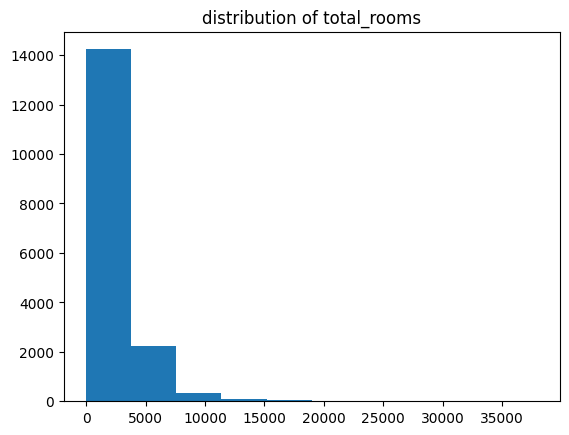

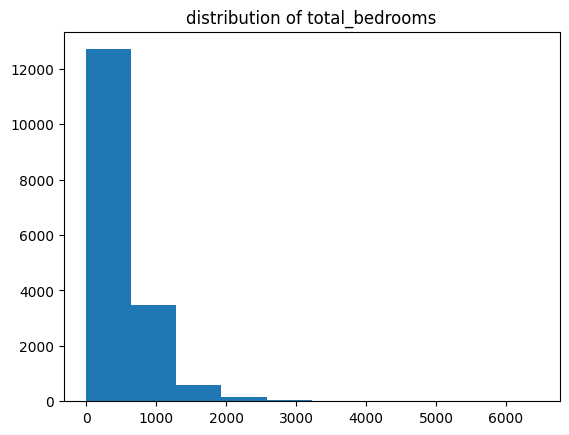

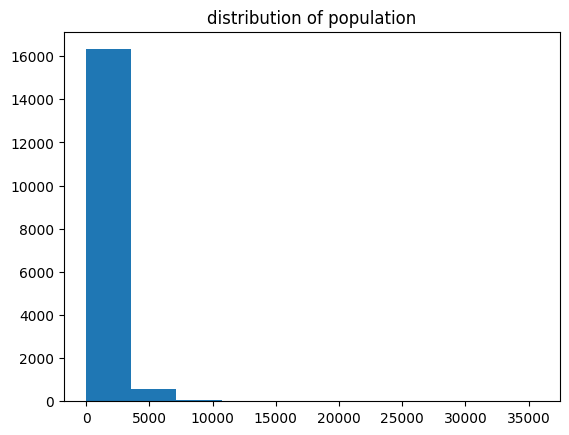

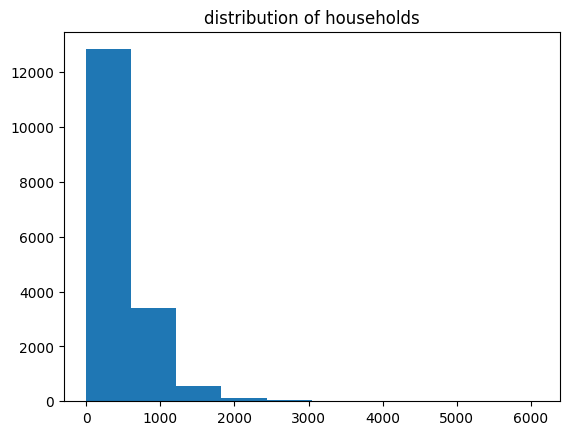

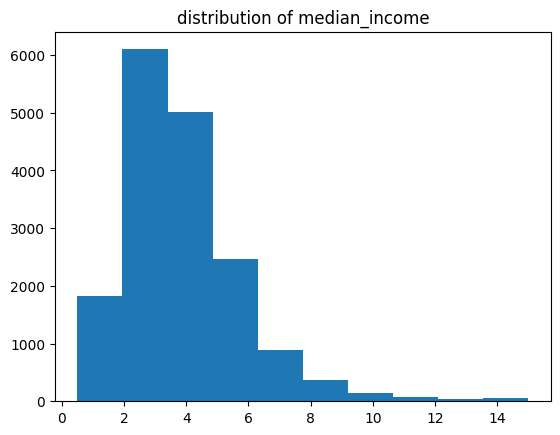

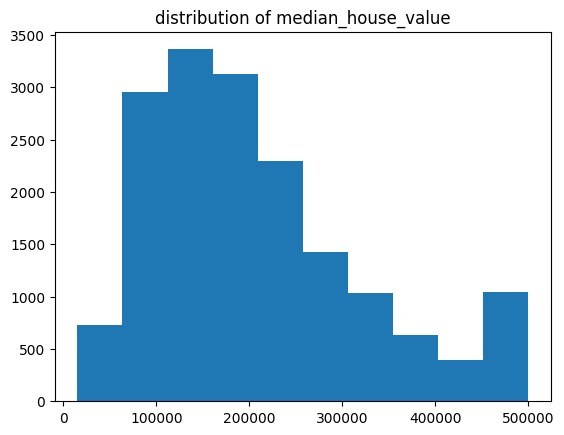

In [7]:
for column in housing_df.columns:
    fig, ax = plt.subplots()
    ax.hist(housing_df[column])
    ax.set_title(f'distribution of {column}')
    

Since the distributions of the data are mostly not normaly distributed I would use robustScaler to scale them so the model can work better

Before scaling I would shuffle the data, separate the target label from the features and split it intp test and train sets

In [13]:
shuffled_df = housing_df.sample(frac=1, random_state=42)
shuffled_df.shape

shuffled_X = shuffled_df.drop('median_house_value', axis=1)
shuffled_y = shuffled_df[["median_house_value"]]

print(f'''
shape of shuffled_X:{shuffled_X.shape}
shape of shuffeld_Y:{shuffled_y.shape}
''')
shuffled_X.head()


shape of shuffled_X:(17000, 8)
shape of shuffeld_Y:(17000, 1)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10941,-120.87,37.77,9.0,4838.0,920.0,2460.0,923.0,3.5959
5250,-118.14,34.11,52.0,2742.0,422.0,1153.0,414.0,8.1124
10292,-120.05,36.98,16.0,3705.0,739.0,2463.0,697.0,2.5288
2266,-117.42,34.02,9.0,5455.0,882.0,3015.0,858.0,4.2321
6398,-118.26,33.97,52.0,1331.0,346.0,1144.0,362.0,1.5326


In [14]:
#Initialize the scaler
scaler = RobustScaler()

#Fit and transform the data in the shuffled_X columns
for column in shuffled_X.columns:
    shuffled_X[[column]] = scaler.fit_transform(shuffled_X[[column]])
    

shuffled_X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10941,-0.627968,0.928760,-1.052632,1.604854,1.383630,1.388829,1.590101,0.023312
5250,0.092348,-0.036939,1.210526,0.364067,-0.034164,-0.015038,0.015468,2.075683
10292,-0.411609,0.720317,-0.684211,0.934142,0.868327,1.392052,0.890951,-0.461596
2266,0.282322,-0.060686,-1.052632,1.970105,1.275445,1.984962,1.389018,0.312411
6398,0.060686,-0.073879,1.210526,-0.471215,-0.250534,-0.024705,-0.145398,-0.914286


In [15]:
shuffled_y.head()

,median_house_value
10941,142700.0
5250,500001.0
10292,61800.0
2266,162800.0
6398,90600.0


In [17]:
X_test = shuffled_X[:1000]
X_train = shuffled_X[1000:]
y_test = shuffled_y[:1000]
y_train = shuffled_y[1000:]

print(f'''
shape of X_test: {X_test.shape}
shape of y_test: {y_test.shape}
shape of X_train: {X_train.shape}
shape of y_train: {y_train.shape}
''')


shape of X_test: (1000, 8)
shape of y_test: (1000, 1)
shape of X_train: (16000, 8)
shape of y_train: (16000, 1)



In [20]:
#Initialize model, fit model and check score on training datas
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6410106682980452

In [23]:
#Predict the prices on test data and evaluate the model by r2 score and mean absolute
y_preds = model.predict(X_test)

r2score = r2_score(y_preds, y_test)
mae = mean_absolute_error(y_preds, y_test)
rmse = math.sqrt(mean_squared_error(y_preds, y_test))
r2score, mae, rmse

(0.4104653591986347, 52486.71121771109, 72867.53677522801)

The model is performing still poorly, I really thought robust scaling would make a huge difference in the performance of the model